## Pandas

In [1]:
#!pip install --upgrade xlrd
import pandas as pd # normalmente pandas se renombra como pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame

### Carga de ficheros CSV con Pandas

[read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) y [read_excel](https://pythonbasics.org/read-excel/) permiten leer ficheros separados por un carácter y ficheros excel
En ambos casos devuelven un dataframe: una tabla en Pandas que representa el conjunto de datos en memoria


##### read_csv

El principal parámetro es la dirección donde se encuentra el fichero. Algunos parámetros comunes de read_csv

- sep: el separador, por defecto “,”, pero en algunos ficheos puede ser ;
- Header: para indicar si la primera línea contiene la cabecera (por defecto True)
- Thousands, decimal: separadores de miles y de decimales
- encoding: codificación de caracteres. Deber ser una codificaciones estándar


In [2]:
fichero = 'https://raw.githubusercontent.com/ainaramu-icjardin/big_data/main/contaminacionLargo.csv'
df = pd.read_csv(fichero)
df

,ANO,MES,DIA,HORA,CO,NO,NO2,PM2.5,PM10,NOx,O3,fechaH,fecha,festivo
0,2019.0,1.0,1.0,1.0,0.6,81.0,73.0,NaN,NaN,196,3.08,2019-01-01 00:00:00,2019-01-01 00:00:00,festivo
1,2019.0,1.0,1.0,2.0,0.8,124.0,82.0,NaN,NaN,272,3.05,2019-01-01 01:00:00,2019-01-01 00:00:00,festivo
2,2019.0,1.0,1.0,3.0,0.7,93.0,72.0,NaN,NaN,215,3.13,2019-01-01 02:00:00,2019-01-01 00:00:00,festivo
3,2019.0,1.0,1.0,4.0,0.6,86.0,66.0,NaN,NaN,198,3.02,2019-01-01 03:00:00,2019-01-01 00:00:00,festivo
4,2019.0,1.0,1.0,5.0,0.6,79.0,64.0,NaN,NaN,185,2.98,2019-01-01 04:00:00,2019-01-01 00:00:00,festivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24021,2021.0,9.0,30.0,20.0,0.3,27.0,80.0,17.0,23.0,122,NaN,2021-09-30 19:00:00,2021-09-30 00:00:00,laborable
24022,2021.0,9.0,30.0,21.0,1.1,168.0,153.0,19.0,30.0,411,NaN,2021-09-30 20:00:00,2021-09-30 00:00:00,laborable
24023,2021.0,9.0,30.0,22.0,1.0,179.0,157.0,28.0,44.0,431,NaN,2021-09-30 21:00:00,2021-09-30 00:00:00,laborable
24024,2021.0,9.0,30.0,23.0,0.8,115.0,133.0,27.0,43.0,309,NaN,2021-09-30 22:00:00,2021-09-30 00:00:00,laborable


Pandas nos permite hacer gráficas de forma muy sencilla, especialmente si el índice es de tipo fecha

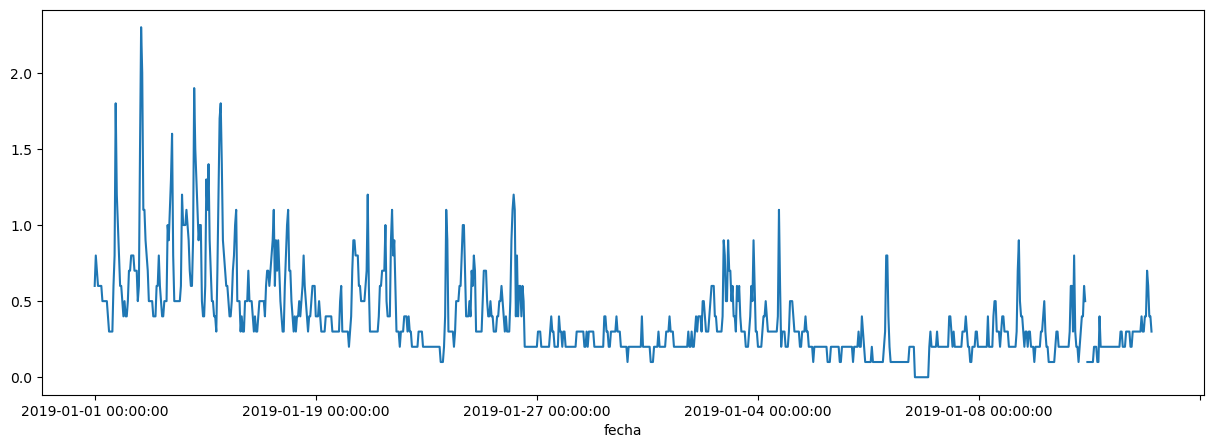

In [3]:
fig, ax = plt.subplots(figsize=(15, 5))
df2 = df[(df.fecha>'2019-01-01') & (df.fecha<'2019-02-10')] 
df2.index=df2.fecha
df2["CO"].plot(ax=ax)
plt.show()

In [4]:
fichero = "https://raw.githubusercontent.com/ainaramu-icjardin/big_data/main/parocomunidades.csv"
df2 = pd.read_csv(fichero, encoding="latin1")
df2

,Comunidad,Periodo,Total
0,Andalucía,2019,20.80
1,Andalucía,2018,21.26
2,Andalucía,2017,24.43
3,Andalucía,2016,28.25
4,Andalucía,2015,29.83
...,...,...,...
337,Melilla,2006,9.86
338,Melilla,2005,12.33
339,Melilla,2004,12.49
340,Melilla,2003,19.88


Ver https://python.readthedocs.io/en/stable/library/codecs.html#standard-encodings para una lista completa de codificaciones

<a name="Carga-de-ficheros-Excel-con-Pandas"></a>
### Carga de ficheros Excel con Pandas

##### read_excel

La lectura con pd.read_excel utiliza internamente otro librería `xlrd` que habra que instalar sino está en el sistema. Este ejemplo carga un fichero con valores bursátiles

In [5]:
fichero='https://github.com/ainaramu-icjardin/big_data/raw/main/raw_open.xlsx'
df = pd.read_excel(fichero)
df

,EUR_Curncy_Open,JPY_Curncy_Open,GBP_Curncy_Open,CHF_Curncy_Open,CAD_Curncy_Open,NOK_Curncy_Open,INDU_Index_Open,SPX_Index_Open,CCMP_Index_Open,SPTSX_Index_Open,...,XAG_Comdty_Open,C_1_Open,w_1_Open,S_1_Open,MO1_Comdty_Open,BDIY_Index_Open,CRY_Index_Open,HG1_Comdty_Open,LMAHDS03_Comdty_Open,LMCADS03_Comdty_Open
0,1.5716,107.77,1.9833,1.0305,1.0099,5.0595,11452.85,1283.60,2315.690,14281.64,...,16.8751,753.25,924.00,1574.25,27.45,9599,463.2700,381.75,3103.0,8425.0
1,1.5769,106.08,1.9946,1.0163,1.0112,5.0607,11345.70,1278.06,2311.990,14402.99,...,17.5800,753.75,879.00,1581.75,28.70,9589,464.4000,387.60,3112.0,8550.0
2,1.5787,105.38,1.9918,1.0175,1.0088,5.0695,11344.64,1276.69,2270.260,14402.99,...,17.7200,722.00,845.00,1604.75,28.78,9379,462.8000,388.25,3119.0,8530.0
3,1.5812,105.40,1.9989,1.0142,1.0151,5.0572,11382.34,1285.82,2313.770,14573.50,...,17.5850,720.50,845.00,1625.00,29.60,9139,467.5400,393.45,3154.0,8600.0
4,1.5782,106.73,1.9853,1.0228,1.0210,5.0956,11216.00,1262.96,2257.830,13992.76,...,17.9650,751.50,860.00,1648.75,28.73,8925,473.6500,407.50,3220.0,8880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,1.1727,111.43,1.3096,0.9930,1.3140,8.1769,25036.90,2799.17,7806.934,16437.39,...,15.5148,356.00,518.00,853.25,17.10,1718,193.4079,274.85,2033.0,6153.5
2627,1.1714,111.10,1.3141,0.9917,1.3139,8.1536,25092.43,2820.68,7914.352,16435.36,...,15.5010,355.25,511.50,844.00,17.41,1774,192.7276,273.65,2067.5,6136.0
2628,1.1713,111.04,1.3135,0.9926,1.3145,8.1638,25183.70,2817.73,7839.094,16393.33,...,15.4986,352.25,511.50,860.00,17.09,1772,193.5608,279.30,2077.0,6269.0
2629,1.1693,111.10,1.3162,0.9919,1.3132,8.1673,25468.55,2835.49,7848.042,16398.57,...,15.5723,361.00,544.75,870.00,17.21,1708,195.4034,284.20,2067.0,6350.0


En el caso de múltiples páginas obtendremos un vector de dataframes. En este ejemplo cargamos datos de accidentes por distritos en la ciudad de Madrid. Se trata de un "libro" excel con hojas de nombre '2009', ..., '2016'

In [6]:
fichero = "https://github.com/ainaramu-icjardin/big_data/raw/main/accidentes_madrid_2009_2016.xlsx"
df_acc = pd.read_excel(fichero,sheet_name='2016')
df_acc

,DISTRITO_ACCIDENTE,COLISIÓN DOBLE,COLISIÓN MÚLTIPLE,CHOQUE CON OBJETO FIJO,ATROPELLO,VUELCO,CAÍDA MOTOCICLETA,CAÍDA CICLOMOTOR,CAÍDA BICICLETA,CAÍDA VIAJERO BUS,OTRAS CAUSAS,CAÍDA VEHÍCULO 3 RUEDAS,Total
0,ARGANZUELA,328,62,86,57,1.0,46,12,10,6,2.0,NaN,610
1,BARAJAS,95,6,50,34,4.0,12,2,4,2,4.0,NaN,213
2,CARABANCHEL,346,55,121,106,5.0,53,18,7,8,6.0,NaN,725
3,CENTRO,444,23,172,144,NaN,97,11,33,5,3.0,NaN,932
4,CHAMARTIN,499,59,122,80,5.0,105,14,8,5,7.0,NaN,904
5,CHAMBERI,382,26,53,88,NaN,63,10,19,1,5.0,NaN,647
6,CIUDAD LINEAL,411,57,119,85,4.0,75,15,8,5,8.0,NaN,787
7,FUENCARRAL-EL PARDO,345,30,132,70,6.0,56,18,28,3,4.0,NaN,692
8,HORTALEZA,248,19,90,56,5.0,33,9,10,1,1.0,NaN,472
9,LATINA,288,40,119,104,3.0,36,12,11,7,2.0,NaN,622


La grabación de ficheros excel se realiza con la función de pandas to_excel, asociada al dataframe.

In [7]:
df_acc.to_excel("./accidentes.xlsx")

**Ejercicio**
Cargar el fichero situado en https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/ciudades_ejemplo.csv
como un dataframe Pandas, y grabarlo a continuación en formato excel.

<a name="Creación"></a>
## Creación desde arrays y diccionarios

Hemos visto que se pueden cargar Dataframes desde un fichero CSV o Excel con `pd.read_csv`, o `pd.read_excel`.
Otra alternativa es a través de listas de listas. Esto es habitual cuando por ejemplo estamos recopilando la información mediante web scraping y la vamos acumulando en listas. En este caso habrá que indicar, además, los nombres de las columnas

In [8]:
datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1641121]  ]
df = DataFrame(datos ,columns=['provincia','habitantes'])
df

,provincia,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1641121


In [9]:
ciudades = ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Alicante', 'Málaga']
habitantes = [6507184, 5609350,  2547986,  1939887, 1838819, 1641121 ]
df2 = DataFrame([ciudades,habitantes],['provincia','habitantes'])
df2

,0,1,2,3,4,5
provincia,Madrid,Barcelona,Valencia,Sevilla,Alicante,Málaga
habitantes,6507184,5609350,2547986,1939887,1838819,1641121


También se puede crear a partir de un diccionario

In [10]:
datos = {'provincia' : ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Alicante', 'Málaga'],
         'habitantes' : [6507184, 5609350,  2547986,  1939887, 1838819, 1641121 ]}
df = DataFrame(datos)
df

,provincia,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1641121


## Acceso a columnas y filas

Al acceder a una columna obtenemos una "serie", es decir una secuencia de datos todos ellos con su etiqueta (en principio un número)

In [11]:
df['provincia']

0       Madrid
1    Barcelona
2     Valencia
3      Sevilla
4     Alicante
5       Málaga
Name: provincia, dtype: object

Otra forma de acceder es con la notación . que solo puede usarse si el nombre de columna no contiene espacios ni símbolos especiales

In [12]:
df.provincia

0       Madrid
1    Barcelona
2     Valencia
3      Sevilla
4     Alicante
5       Málaga
Name: provincia, dtype: object

Veamos cuál es el tipo de una columna

In [13]:
print(type(df['provincia']))

<class 'pandas.core.series.Series'>


Como hemos visto, una columna es de tipo `Series`y  tiene 2 componentes, el índice y los valores

In [14]:
df.provincia.values

array(['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Alicante', 'Málaga'],
      dtype=object)

In [15]:
df.provincia.index

RangeIndex(start=0, stop=6, step=1)

Para acceder por varias columnas a la vez usar dobles corchetes, y el resultado es un nuevo Dataframe

In [16]:
df[['provincia','habitantes']]

,provincia,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1641121


Se puede acceder a las columnas, a los índices y a los valores

In [17]:
df.columns

Index(['provincia', 'habitantes'], dtype='object')

In [18]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [19]:
df.values

array([['Madrid', 6507184],
       ['Barcelona', 5609350],
       ['Valencia', 2547986],
       ['Sevilla', 1939887],
       ['Alicante', 1838819],
       ['Málaga', 1641121]], dtype=object)

Sin embargo, no podemos acceder a la fila por posición directamente:

In [20]:
# df[0]  # da error

Sí podríamos usar df.values, que nos da todas las filas, aunque no es muy habitual

In [21]:
df.values[0]

array(['Madrid', 6507184], dtype=object)

En lugar de eso, utilizaremos `iloc` que recibe un entero como parámetro para acceder a la fila

In [22]:
df.iloc[0]

provincia      Madrid
habitantes    6507184
Name: 0, dtype: object

**Ejemplo 1**

Acceder a las 3 primeras filas. Pista: utilizar la misma notación que si fuera una lista

In [23]:
df.iloc[0:3]

,provincia,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986


Igualmente dentro de la fila  podemos acceder a la columna por posición

In [24]:
df.iloc[0][0], df.iloc[0][1] 

('Madrid', 6507184)

Otra forma de lograr lo mismo [fila,columna]

In [25]:
df.iloc[0,0], df.iloc[0,1]  

('Madrid', 6507184)

**Ejermplo 2** Seleccionar las filas de la 2 a la 4, ambas incluidas (comenzando en 0) y solo la primera columna (la número 0)

In [26]:
df.iloc[2:5,0]

2    Valencia
3     Sevilla
4    Alicante
Name: provincia, dtype: object

**Acceso por índice.**

A menudo el índice es la posición sin más, con lo que la función iloc nos sirve. Sin embargo esto no es siempre así

In [27]:
datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1641121]  ]
df = DataFrame(datos ,columns=['provincia','habitantes'],
               index=['Capital','Capital Com. Autonoma','Capital Com. Autonoma','Capital Com. Autonoma','Provincia','Provincia'])
df

,provincia,habitantes
Capital,Madrid,6507184
Capital Com. Autonoma,Barcelona,5609350
Capital Com. Autonoma,Valencia,2547986
Capital Com. Autonoma,Sevilla,1939887
Provincia,Alicante,1838819
Provincia,Málaga,1641121


Si se quiere acceder por el índice se puede usar `loc`

In [28]:
df.loc['Capital']

provincia      Madrid
habitantes    6507184
Name: Capital, dtype: object

In [29]:
df.loc['Provincia']

,provincia,habitantes
Provincia,Alicante,1838819
Provincia,Málaga,1641121


Si se quiere acceder por nombre de fila y columna podemos hacerlo seleccionando primero la fila:

In [30]:
df.loc['Provincia']["provincia"]

Provincia    Alicante
Provincia      Málaga
Name: provincia, dtype: object

O utilizar `loc`con la notación habitual fila, columna

In [31]:
df.loc['Provincia','provincia']

Provincia    Alicante
Provincia      Málaga
Name: provincia, dtype: object

<a name="Modificación"></a>
## Modificación, inserción y borrado de columnas y filas

Para modificar los datos seleccionamos los datos a modificar y le asignamos el nuevo valor

In [33]:
datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1641121]  ]
df = DataFrame(datos ,columns=['provincias','habitantes'], index=['a','b','c','d','e','f'])
df.iloc[1] = 0
df

,provincias,habitantes
a,Madrid,6507184
b,0,0
c,Valencia,2547986
d,Sevilla,1939887
e,Alicante,1838819
f,Málaga,1641121


In [34]:
df['superficie'] = 0
df

,provincias,habitantes,superficie
a,Madrid,6507184,0
b,0,0,0
c,Valencia,2547986,0
d,Sevilla,1939887,0
e,Alicante,1838819,0
f,Málaga,1641121,0


Por tanto para crear una columna nos basta con "rellenarla" del valor que se desee. Luego veremos casos más complejos.

### Eliminar filas y columnas
Una forma de eliminar columnas es seleccionar solo las que se quieren mantener. Primero preparamos los datos.

In [35]:
datos = {'provincia' : ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Alicante', 'Málaga'],
         'habitantes' : [6507184, 5609350,  2547986,  1939887,  1838819, 1641121 ]}
df = DataFrame(datos)
df["superficie"] = 0
df             

,provincia,habitantes,superficie
0,Madrid,6507184,0
1,Barcelona,5609350,0
2,Valencia,2547986,0
3,Sevilla,1939887,0
4,Alicante,1838819,0
5,Málaga,1641121,0


In [36]:
df2 = df.loc[ : , ['superficie'] ]  # todas las filas, columna solo superficie
df2

,superficie
0,0
1,0
2,0
3,0
4,0
5,0


Equivalente a 

In [37]:
df2 = df[["superficie"]]
df2

,superficie
0,0
1,0
2,0
3,0
4,0
5,0


Varias columnas

In [38]:
df2 = df[['provincia', 'superficie'] ]
df2

,provincia,superficie
0,Madrid,0
1,Barcelona,0
2,Valencia,0
3,Sevilla,0
4,Alicante,0
5,Málaga,0


En general para borrar filas o columnas por nombre usaremos [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html). El parámetro `axis`indica si queremos borrar filas (0) o columnas (1)

In [39]:
datos = {'provincia' : ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Alicante', 'Málaga'],
         'habitantes' : [6507184, 5609350,  2547986,  1939887, 1838819, 1641121 ]}
df = DataFrame(datos)
df["superficie"] = 0
df

,provincia,habitantes,superficie
0,Madrid,6507184,0
1,Barcelona,5609350,0
2,Valencia,2547986,0
3,Sevilla,1939887,0
4,Alicante,1838819,0
5,Málaga,1641121,0


In [40]:
dfSinFila = df.drop([3,5],axis=0)
dfSinFila

,provincia,habitantes,superficie
0,Madrid,6507184,0
1,Barcelona,5609350,0
2,Valencia,2547986,0
4,Alicante,1838819,0


In [41]:
dfSinCol = df.drop(['superficie'],axis=1)
dfSinCol

,provincia,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1641121


Si queremos podemos eviar el uso de axis utilizando los parámetros `index` y `columns`

In [42]:
datos = {'provincia' : ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Alicante', 'Málaga'],
         'habitantes' : [6507184, 5609350,  2547986,  1939887, 1838819, 1641121 ]}
df = DataFrame(datos)
df["superficie"] = 0
df

,provincia,habitantes,superficie
0,Madrid,6507184,0
1,Barcelona,5609350,0
2,Valencia,2547986,0
3,Sevilla,1939887,0
4,Alicante,1838819,0
5,Málaga,1641121,0


In [43]:
df.drop(index=[1,3])

,provincia,habitantes,superficie
0,Madrid,6507184,0
2,Valencia,2547986,0
4,Alicante,1838819,0
5,Málaga,1641121,0


In [44]:
df.drop(columns=['provincia'])

,habitantes,superficie
0,6507184,0
1,5609350,0
2,2547986,0
3,1939887,0
4,1838819,0
5,1641121,0


Las columnas también se puede eliminar con `del` como en los diccionarios

In [45]:
if 'superficie' in df2:
    del df2['superficie'] 
df2

,provincia
0,Madrid
1,Barcelona
2,Valencia
3,Sevilla
4,Alicante
5,Málaga


Una variante interesante es `pop`, que borra una fila y la devuelve

In [46]:
df2 = df.copy()
habi = df2.pop("habitantes")
df2

,provincia,superficie
0,Madrid,0
1,Barcelona,0
2,Valencia,0
3,Sevilla,0
4,Alicante,0
5,Málaga,0


In [47]:
habi

0    6507184
1    5609350
2    2547986
3    1939887
4    1838819
5    1641121
Name: habitantes, dtype: int64

In [48]:
df

,provincia,habitantes,superficie
0,Madrid,6507184,0
1,Barcelona,5609350,0
2,Valencia,2547986,0
3,Sevilla,1939887,0
4,Alicante,1838819,0
5,Málaga,1641121,0


### Filtros

Para *filtrar* filas lo normal es escribir una expresión booleana que solo cumplan las filas que queremos y acceder mediante este filtro

In [50]:
datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1694089]  ]
df = DataFrame(datos ,columns=['ciudades','habitantes'],
               index=['Capital','Capital Com. Autonoma','Capital Com. Autonoma','Ciudad','Ciudad','Ciudad'])

df

,ciudades,habitantes
Capital,Madrid,6507184
Capital Com. Autonoma,Barcelona,5609350
Capital Com. Autonoma,Valencia,2547986
Ciudad,Sevilla,1939887
Ciudad,Alicante,1838819
Ciudad,Málaga,1694089


Ciudades con más de 200000 habitantes

In [51]:
filtro = df.habitantes > 2000000
df2 = df[filtro]
df2

,ciudades,habitantes
Capital,Madrid,6507184
Capital Com. Autonoma,Barcelona,5609350
Capital Com. Autonoma,Valencia,2547986


Esto es importante pero bastante complejo. Para entenderlo veamos primero el filtro

In [52]:
filtro

Capital                   True
Capital Com. Autonoma     True
Capital Com. Autonoma     True
Ciudad                   False
Ciudad                   False
Ciudad                   False
Name: habitantes, dtype: bool

Aquí el índice no es importante, lo importante es que hay un True en cada fila que cumple la condición y un false en la que no.

Y Python permite usar una secuencia de Trues y False para acceder a elementos, devolviendo solo en los que hay Trues; por eso df[filtro] es equivalente a 

In [53]:
df[[True,True,True,False,False,False]]

,ciudades,habitantes
Capital,Madrid,6507184
Capital Com. Autonoma,Barcelona,5609350
Capital Com. Autonoma,Valencia,2547986


**Ejemplo** La función de strings `startswith` indica si un string empieza por una letra, vamos a usarla para quedarnos solo con las ciudades que empiezan por M

In [54]:
filtro = df.ciudades.str.startswith("M")  # ciudades cuyo nombre empieza por M
df2 = df[filtro]
df2

,ciudades,habitantes
Capital,Madrid,6507184
Ciudad,Málaga,1694089


In [55]:
filtro

Capital                   True
Capital Com. Autonoma    False
Capital Com. Autonoma    False
Ciudad                   False
Ciudad                   False
Ciudad                    True
Name: ciudades, dtype: bool

**Detalle**: Fijate en el df.ciudades**.str**.startswith("M"). Es necesario porque al ser startswith una función que solo vale para strings tenemos que "avisar" a Python de que la función es de tipo string, cuando por defecto las considera numéricas.

Si lo que queremos es saber cuántos elementos cumplen el filtro, nos basta con recordar que los Trues se corresponden con 1s, y los Falses con 0s.

In [56]:
sum(filtro)

2

### Añadir filas

Veamos como añadir filas a un dataframe ya existente con concat

In [57]:
datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1694089]  ]
df = DataFrame(datos ,columns=['ciudades','habitantes'])
df

,ciudades,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1694089


In [58]:
new_row = pd.DataFrame({'ciudades': ['Cáceres'], 'habitantes': [394151]})
df = pd.concat([df, new_row], ignore_index=True)
df

,ciudades,habitantes
0,Madrid,6507184
1,Barcelona,5609350
2,Valencia,2547986
3,Sevilla,1939887
4,Alicante,1838819
5,Málaga,1694089
6,Cáceres,394151


Ahora añadimos una columna con la superficie

In [59]:
df["superficie"] = [8027, 7773, 10807,14036,5817,7306, 19868]
df

,ciudades,habitantes,superficie
0,Madrid,6507184,8027
1,Barcelona,5609350,7773
2,Valencia,2547986,10807
3,Sevilla,1939887,14036
4,Alicante,1838819,5817
5,Málaga,1694089,7306
6,Cáceres,394151,19868


Y obtenemos la densidad:

In [60]:
df["densidad"] = df["habitantes"]/df["superficie"]
df

,ciudades,habitantes,superficie,densidad
0,Madrid,6507184,8027,810.662016
1,Barcelona,5609350,7773,721.645439
2,Valencia,2547986,10807,235.771815
3,Sevilla,1939887,14036,138.207965
4,Alicante,1838819,5817,316.111226
5,Málaga,1694089,7306,231.876403
6,Cáceres,394151,19868,19.838484


### Ordenar

Para ordenar utilizaremos `sort_values`, nótese el uso de inplace=True para que modifique el dataframe y no devuelva una copia

In [61]:
datos = [['Madrid', 6507184], ['Barcelona', 5609350], 
         ['Valencia', 2547986], ['Sevilla', 1939887], 
         ['Alicante', 1838819], ['Málaga',1694089]  ]
df = DataFrame(datos ,columns=['provincia','habitantes'])
df.sort_values(by='provincia', ascending=True, inplace=True)
df

,provincia,habitantes
4,Alicante,1838819
1,Barcelona,5609350
0,Madrid,6507184
5,Málaga,1694089
3,Sevilla,1939887
2,Valencia,2547986


Ordenar por dos columnas

In [62]:
datos = [['Bea', 'Caceno'], ['Antonio', 'Caceno'],  ['Olatz', 'Ducasse'], ['Andrew', 'Albrich'] ]
df = DataFrame(datos ,columns=['nombre','apellido'])
df.sort_values(by='apellido',ascending=True)

,nombre,apellido
3,Andrew,Albrich
0,Bea,Caceno
1,Antonio,Caceno
2,Olatz,Ducasse


In [63]:
df.sort_values(by=['apellido','nombre'],ascending=True)

,nombre,apellido
3,Andrew,Albrich
1,Antonio,Caceno
0,Bea,Caceno
2,Olatz,Ducasse


<a name="Samples"></a>
## Muestras

En ocasiones nos interesará tomar muestras de un dataset muy grande para tener unos pocos datos manejables y representativos

Las muestras también se utilizarán en nuestros experimentos con datos, dividiendo el conjunto en dos:

- Entrenamiento

- Test

El conjunto de entrenamiento lo usaremos para nuestras hipótesis, nuestros modelos. Una vez realizado el modelo lo probaremos con datos "nuevos" los datos de test

En ambos casos utilizaremos [sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) al que se puede pasar la proporción de datos a obtener o el número de valores a obtener



In [64]:
url = "https://github.com/ainaramu-icjardin/big_data/raw/main/madpollution_output.csv"
df = pd.read_csv(url)
df

,year,month,day,hour,minute,second,laborday,saturday,sunday,holiday,...,PM25,NOx,O3,windspeed,winddirection,temperature,humidity,pressure,rain,traffic
0,2019,8,1,0,0,0,0,1,0,0,...,10.0,29.0,58.87,1.84,97.0,26.1,52.0,943.0,0.0,570.0
1,2019,8,1,1,0,0,0,1,0,0,...,10.0,18.0,63.73,1.97,117.0,24.9,55.0,943.0,0.0,404.0
2,2019,8,1,2,0,0,0,1,0,0,...,9.0,19.0,66.50,1.72,96.0,24.0,55.0,943.0,0.0,287.0
3,2019,8,1,3,0,0,0,1,0,0,...,10.0,15.0,66.62,1.55,106.0,23.3,55.0,943.0,0.0,209.0
4,2019,8,1,4,0,0,0,1,0,0,...,10.0,18.0,62.57,1.13,67.0,22.9,57.0,943.0,0.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,2021,5,25,19,0,0,0,1,0,0,...,10.0,55.0,0.00,0.98,6.0,26.1,29.0,948.0,0.0,1399.0
14745,2021,5,25,20,0,0,0,1,0,0,...,7.0,58.0,0.00,0.91,42.0,25.0,30.0,948.0,0.0,1342.0
14746,2021,5,25,21,0,0,0,1,0,0,...,11.0,94.0,0.00,0.61,76.0,24.5,32.0,948.0,0.0,1096.0
14747,2021,5,25,22,0,0,0,1,0,0,...,6.0,84.0,0.00,1.26,92.0,22.7,42.0,949.0,0.0,835.0


In [65]:
# solo queremos 100 filas al azar
df.sample(n=100)

,year,month,day,hour,minute,second,laborday,saturday,sunday,holiday,...,PM25,NOx,O3,windspeed,winddirection,temperature,humidity,pressure,rain,traffic
3114,2019,12,17,7,0,0,0,1,0,0,...,13.0,121.0,12.46,1.15,146.0,9.1,82.0,930.0,0.0,1262.0
14036,2021,4,26,7,0,0,0,1,0,0,...,14.0,149.0,11.73,0.64,83.0,11.6,93.0,937.0,0.0,1295.0
6283,2020,5,18,18,0,0,0,1,0,0,...,5.0,25.0,105.40,1.43,219.0,28.9,23.0,949.0,0.0,780.0
12250,2021,2,10,20,0,0,0,1,0,0,...,9.0,45.0,48.16,1.60,224.0,10.4,67.0,945.0,0.0,1271.0
7142,2020,6,23,20,0,0,0,1,0,0,...,13.0,115.0,61.80,0.72,192.0,34.5,19.0,943.0,0.0,1209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11677,2021,1,17,15,0,0,0,0,0,1,...,36.0,97.0,50.02,0.88,189.0,9.9,37.0,956.0,0.0,961.0
8908,2020,9,9,2,0,0,0,1,0,0,...,1.0,88.0,10.93,0.52,41.0,18.1,42.0,952.0,0.0,202.0
5073,2020,3,29,6,0,0,0,0,0,1,...,4.0,33.0,30.86,0.62,72.0,4.7,73.0,947.0,0.0,97.0
10568,2020,12,2,7,0,0,0,1,0,0,...,10.0,213.0,5.88,0.55,58.0,8.1,69.0,945.0,0.0,1307.0


Ejemplo de división de un dataframe en dos de forma aleatoria

In [66]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)
print(len(train_dataset), len(test_dataset))

11799 2950


También se pueden tomar muestras con reemplazamiento, lo que significa que se puede repetir

In [67]:
datos = [['Bea', 'Caceno'], ['Antonio', 'Caceno'],  ['Olatz', 'Ducasse'], ['Andrew', 'Albrich'] ]
df = DataFrame(datos ,columns=['nombre','apellido'])
df

,nombre,apellido
0,Bea,Caceno
1,Antonio,Caceno
2,Olatz,Ducasse
3,Andrew,Albrich


In [68]:
df.sample(n=10,replace=True)

,nombre,apellido
2,Olatz,Ducasse
1,Antonio,Caceno
3,Andrew,Albrich
0,Bea,Caceno
1,Antonio,Caceno
2,Olatz,Ducasse
3,Andrew,Albrich
2,Olatz,Ducasse
2,Olatz,Ducasse
2,Olatz,Ducasse


<a name="Iterar"></a>
## Iterar

Intentaremos evitar iterar por el dataframe con un `for`, pero a veces no hay más remedio. En ese caso usaremos `iterrows`
 que nos devuelve cada fila como un array con dos posiciones, la 0 para el índice y la 1 para la fila en sí

In [69]:
file = "https://github.com/ainaramu-icjardin/big_data/raw/main/top10s.csv"
df = pd.read_csv(file,encoding="latin-1", index_col=0)
df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [70]:
for row in df.iterrows():
    print(row[1]["title"])

Hey, Soul Sister
Love The Way You Lie
TiK ToK
Bad Romance
Just the Way You Are
Baby
Dynamite
Secrets
Empire State of Mind (Part II) Broken Down
Only Girl (In The World)
Club Can't Handle Me (feat. David Guetta)
Marry You
Cooler Than Me - Single Mix
Telephone
Like A G6
OMG (feat. will.i.am)
Eenie Meenie
The Time (Dirty Bit)
Alejandro
Your Love Is My Drug
Meet Me Halfway
Whataya Want from Me
Take It Off
Misery
All The Right Moves
Animal
Naturally
I Like It
Teenage Dream
California Gurls
3
My First Kiss - feat. Ke$ha
Blah Blah Blah (feat. 3OH!3)
Imma Be
Try Sleeping with a Broken Heart
Sexy Bitch (feat. Akon)
Bound To You - Burlesque Original Motion Picture Soundtrack
If I Had You
Rock That Body
Dog Days Are Over
Something's Got A Hold On Me - Burlesque Original Motion Picture Soundtrack
Doesn't Mean Anything
Hard
Loca
You Lost Me
Not Myself Tonight
Written in the Stars (feat. Eric Turner)
DJ Got Us Fallin' In Love (feat. Pitbull)
Castle Walls (feat. Christina Aguilera)
Break Your Heart
H

In [71]:
## Y ahora sin iterrows...

## Índices

Ya hemos visto unas cuantas cosas sobre los índices

- Se usan para referenciar fila
- Se puede acceder con loc
- Hay índices de tipos diversos

Algunas cosas nuevas:



In [73]:
data = [[1,2,3,4,5,6,7],
        [1,2,0,0,0,6,7],
        [1,2,0,0,0,6,7],
        [1,2,0,0,0,6,7],
        [1,2,3,4,5,6,7],
       ]
df1 = pd.DataFrame(data, columns=[chr(ord('a')+i) for i in range(len(data[0]))],
               index = ['i'+chr(ord('a')+i) for i in range(len(data))])
df2 = pd.DataFrame(data, columns=[chr(ord('a')+i) for i in range(len(data[0]))],
               index = [i-1 for i in range(len(data),0,-1)])
df3 = pd.DataFrame(data, columns=[chr(ord('a')+i) for i in range(len(data[0]))],
               index = [np.random.randint(3) for i in range(len(data),0,-1)])


In [74]:
print(df1,df2,df3,sep="\n")

    a  b  c  d  e  f  g
ia  1  2  3  4  5  6  7
ib  1  2  0  0  0  6  7
ic  1  2  0  0  0  6  7
id  1  2  0  0  0  6  7
ie  1  2  3  4  5  6  7
   a  b  c  d  e  f  g
4  1  2  3  4  5  6  7
3  1  2  0  0  0  6  7
2  1  2  0  0  0  6  7
1  1  2  0  0  0  6  7
0  1  2  3  4  5  6  7
   a  b  c  d  e  f  g
2  1  2  3  4  5  6  7
0  1  2  0  0  0  6  7
0  1  2  0  0  0  6  7
2  1  2  0  0  0  6  7
2  1  2  3  4  5  6  7


A menudo interesa asegurarse de si es monótono creciente.

In [75]:
df1.index.is_monotonic_increasing, df2.index.is_monotonic_increasing, df3.index.is_monotonic_increasing

(True, False, False)

También de si hay valores repetidos

In [76]:
df1.index.is_unique, df2.index.is_unique, df3.index.is_unique

(True, True, False)

En caso de que no sea único podemos querer obtener los valores distintos

In [77]:
df3.index.unique()

Int64Index([2, 0], dtype='int64')

Una de las operaciones más básicas, que haremos a menudo es reindexar:

In [78]:
df4 = df2.reindex([1,2,3,4,5])
df4

,a,b,c,d,e,f,g
1,1.0,2.0,0.0,0.0,0.0,6.0,7.0
2,1.0,2.0,0.0,0.0,0.0,6.0,7.0
3,1.0,2.0,0.0,0.0,0.0,6.0,7.0
4,1.0,2.0,3.0,4.0,5.0,6.0,7.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- ¿Por qué necesitamos hacer df4 y no queda modificado df2? Porque los índices son inmutables. Para que se cambie en el propio DataFrame usar el argumento `inplace=True`

- ¿Por qué aparecen los NaN? Porque no existe el indice 5

In [79]:
df4 = df2.reindex([1,2,3,4,5],fill_value=0)
df4

,a,b,c,d,e,f,g
1,1,2,0,0,0,6,7
2,1,2,0,0,0,6,7
3,1,2,0,0,0,6,7
4,1,2,3,4,5,6,7
5,0,0,0,0,0,0,0


También vale para columnas

In [80]:
df4 = df2.reindex(columns=[1,2,3,4,5],fill_value=-1)
df4

,1,2,3,4,5
4,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1
0,-1,-1,-1,-1,-1


Esto es un poco desastre. ¿No podemos solo cambiar los índices sin cargarnos todo? La solución es `reset_index()`

In [81]:
df2 = DataFrame(data, columns=[chr(ord('a')+i) for i in range(len(data[0]))],
               index = [i-1 for i in range(len(data),0,-1)])
df2

,a,b,c,d,e,f,g
4,1,2,3,4,5,6,7
3,1,2,0,0,0,6,7
2,1,2,0,0,0,6,7
1,1,2,0,0,0,6,7
0,1,2,3,4,5,6,7


In [82]:
df2.reset_index(inplace=True)
df2

,index,a,b,c,d,e,f,g
0,4,1,2,3,4,5,6,7
1,3,1,2,0,0,0,6,7
2,2,1,2,0,0,0,6,7
3,1,1,2,0,0,0,6,7
4,0,1,2,3,4,5,6,7


El índice se 'guarda' en una columna `index`. Se puede evitar utilizando `drop=True`

In [83]:
data = [[1,2,3,4,5,6,7],
        [1,2,0,0,0,6,7],
        [1,2,0,0,0,6,7],
        [1,2,0,0,0,6,7],
        [1,2,3,4,5,6,7],
       ]
df2 = DataFrame(data, columns=[chr(ord('a')+i) for i in range(len(data[0]))],
               index = [i-1 for i in range(len(data),0,-1)])
df2.reset_index(drop=True, inplace=True)
df2

,a,b,c,d,e,f,g
0,1,2,3,4,5,6,7
1,1,2,0,0,0,6,7
2,1,2,0,0,0,6,7
3,1,2,0,0,0,6,7
4,1,2,3,4,5,6,7


Si no se quiere que el índice empiece en 0, ni tampoco que se pierda información, se puede acceder directamente a .index o a .columns

In [84]:
df2.index = ['a','b','c','d','e']
df2

,a,b,c,d,e,f,g
a,1,2,3,4,5,6,7
b,1,2,0,0,0,6,7
c,1,2,0,0,0,6,7
d,1,2,0,0,0,6,7
e,1,2,3,4,5,6,7


In [85]:
df2[df2.index=='a']

,a,b,c,d,e,f,g
a,1,2,3,4,5,6,7


In [86]:
df2.loc['a']

a    1
b    2
c    3
d    4
e    5
f    6
g    7
Name: a, dtype: int64

Si se accede directamente a `index` se deben poner tantos elementos como filas hay, si no se obtendrá un error

In [102]:
df2.index = ['a','b','c','d']

**Ej.** Queremos sumar dos series:

In [88]:
a = Series([1,2,3,4],['a','b','c','d'])
b = Series([1,2,3,4],[10,20,30,40])

Sin embargo:

In [89]:
a+b

a    NaN
b    NaN
c    NaN
d    NaN
10   NaN
20   NaN
30   NaN
40   NaN
dtype: float64

¿qué podemos hacer?

In [90]:
a.reset_index(drop=True)+b.reset_index(drop=True)

0    2
1    4
2    6
3    8
dtype: int64

Se pueden eliminar filas a partir del índice con drop()

In [91]:
c = a.reset_index(drop=True)+b.reset_index(drop=True)
print(c,type(c))
d = c.drop([1,2])
print(d)

0    2
1    4
2    6
3    8
dtype: int64 <class 'pandas.core.series.Series'>
0    2
3    8
dtype: int64


In [92]:
df = DataFrame(np.arange(16).reshape((4, 4)), 
               columns=['c'+str(i) for i in range(4)],
               index = ['f'+str(i) for i in range(4)])
df

,c0,c1,c2,c3
f0,0,1,2,3
f1,4,5,6,7
f2,8,9,10,11
f3,12,13,14,15


In [93]:
df.drop(['c1','c2'],axis=1,inplace=True)
df

,c0,c3
f0,0,3
f1,4,7
f2,8,11
f3,12,15


In [94]:
df = DataFrame(np.arange(16).reshape((4, 4)), 
               columns=['c'+str(i) for i in range(4)],
               index = ['f'+str(i) for i in range(4)])
df.drop(['f1','f2'],axis=0,inplace=True)
df

,c0,c1,c2,c3
f0,0,1,2,3
f3,12,13,14,15


Como ya hemos visto las operaciones aritméticas utilizan los índices comunes. Esto vale tanto para filas como para columnas

In [95]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
print(df1)
print(df2)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0
      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [96]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Para evitarlo se puede añadir 0 para evitar el valor `NaN`

In [97]:
df1.add(df2,fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Análogamente existen funciones `add`, `sub`, `div`, `mul`

Si lo que se quiere es ordenar los índices, no cambiarlo, se puede utilizar `sort_index()`

In [98]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('dfab'),index=list('431'))
df1

,d,f,a,b
4,0.0,1.0,2.0,3.0
3,4.0,5.0,6.0,7.0
1,8.0,9.0,10.0,11.0


In [101]:
df1.sort_index(inplace=True)